## Comparison of Lloyds Banking Group and Natwest Group for BoE

### Problem Statement

This stage seeks to assess your ability to work with data, produce relevant visualisations and articulate their usefulness. 

Using the Consolidated Income Statement and Consolidated Balance Sheet data tabs in each document, please draw a comparison between the performance of the two Groups over the two full years 2020 and 2019. In your comparison, please provide:
1.	At least three different visualisations and a short description of what they show
2.	Commentary on the importance of each visualisation and how it would help an end-user draw conclusions about one or more aspects of one Group’s performance over the other.


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns

## Data Load - NatWest
The first thing we must do is load in our data from their current forms into easier to use formats. 
I'll start with Natwest income statement:

In [2]:
file_path_nw = r'C:\Users\mattp\Desktop\BoE Interview\NatWest Group 2020 EOY.xlsx'
nw_df_1 = pd.read_excel(file_path_nw, sheet_name = '1.1 - Income Statement', header = 3)
nw_df_1 = nw_df_1[nw_df_1.columns[~nw_df_1.isnull().all()]] # Remove blank columns of whitespace

In [3]:
nw_df_1.head(3)

,Summary consolidated income statement,Unnamed: 5,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,2018,NaN,2019,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN
1,NaN,Q4,Full year,Q1,Q2,Q3,Q4,Full year,Q1,Q2,Q3,Q4,Full Year
2,NaN,£m,£m,£m,£m,£m,£m,£m,£m,£m,£m,£m,£m


In [4]:
# Unfortunately care is required to ensure that we split the tables correctly in the case a sheet contains more than one.
split_value = nw_df_1[nw_df_1.isna().all(axis = 1)].index[1]
nw_df_1_1 = nw_df_1.loc[0:split_value-2,:]
nw_df_1_2 = nw_df_1.loc[split_value+1:,:]
nw_df_1_2.reset_index(inplace=True, drop = True)

In [5]:
# Function that cleans up the column names to be distinct financial quarters and for table contents in first column.
# Also drops rows used to create column names, removes rows with no information and corrects index values.
def nw_clean_1(table_name, nw_df):
    updated_cols = [table_name]
    year, quarter, quantifier = nw_df.iloc[0:3,1]
    for i in range(1, nw_df.shape[1]):
        if pd.isna(nw_df.iloc[0,i]) is False:
            year = nw_df.iloc[0,i]
        if pd.isna(nw_df.iloc[1,i]) is False:
            quarter = nw_df.iloc[1,i] 
        if pd.isna(nw_df.iloc[2,i]) is False:
            quantifier = nw_df.iloc[2,i]
        updated_cols.append(str(year) + '_' + str(quarter) + '_' + str(quantifier)) # Create new column names
    
    nw_df.set_axis(updated_cols, axis = 1, inplace = True)
    nw_df_temp = nw_df.drop(index = [0,1,2])
    nw_df_temp = nw_df_temp[~nw_df_temp.isna().all(axis=1)]
    nw_df_temp.set_index(nw_df_temp[table_name], drop = True, inplace = True)
    nw_df_output = nw_df_temp.drop(columns=[table_name])
    return nw_df_output

In [6]:
nw_df_1_1 = nw_clean_1('Consolidated_Income_Statement',nw_df_1_1)
nw_df_1_2 = nw_clean_1('Incomw_Statement_Key_metrics_and_ratios',nw_df_1_2)

# Sort out rows that have multiple columns - more aestethic than anything else
nw_df_1_2.rename(index={'- basic ': 'Earnings/(loss) per ordinary share - basic',
                         'the period (millions)': 'Average number of ordinary shares outstanding during the period (millions)'}
                  , inplace = True)
nw_df_1_2.drop(index=['Earnings/(loss) per ordinary share','Average number of ordinary shares outstanding during'], inplace = True)

In [7]:
nw_df_1_2.head(3)

,2018_Q4_£m,2018_Full year_£m,2019_Q1_£m,2019_Q2_£m,2019_Q3_£m,2019_Q4_£m,2019_Full year_£m,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full year_£m
Incomw_Statement_Key_metrics_and_ratios,,,,,,,,,,,,
Cost:income ratio (1),0.805,0.717,0.634,0.526,0.929,0.594,0.651,0.577,0.709,0.745,0.922,0.729
Earnings/(loss) per ordinary share - basic,2.4,13.5,5.9,11,-2.6,11.7,26,2.4,-8.2,0.5,-0.9,-6.2
Return on tangible equity (2),0.035,0.048,0.083,0.158,-0.038,0.177,0.094,0.036,-0.124,0.008,-0.014,-0.024


In [8]:
# The tables now looks much cleaner - though we notice that in nw_df_1_1_1 has an error in the 2020 Full Year NII.
nw_df_1_1.iloc[:,-5:].head(3)

,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full Year_£m
Consolidated_Income_Statement,,,,,
Net interest income,1942,1910,1926,1971,7#df749
Own credit adjustments,155,-102,-34,-43,-24
Strategic disposals,0,0,0,0,0


In [9]:
nw_df_1_1.iloc[0,-1] = sum(nw_df_1_1.iloc[0,-5:-1])
nw_df_1_1.iloc[:,-5:].head(3)

,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full Year_£m
Consolidated_Income_Statement,,,,,
Net interest income,1942,1910,1926,1971,7749
Own credit adjustments,155,-102,-34,-43,-24
Strategic disposals,0,0,0,0,0


Now the natwest balance sheet:

In [10]:
# Function that cleans up the column names to be distinct financial quarters and for table contents in first column.
# Also drops rows used to create column names, removes rows with no information and corrects index values.
def nw_clean_2(table_name, nw_df):
    updated_cols = [table_name]
    year, quarter, quantifier = nw_df.iloc[0:3,1]
    for i in range(1, nw_df.shape[1]):
        if pd.isna(nw_df.iloc[0,i]) is False:
            year = nw_df.iloc[0,i]
        if pd.isna(nw_df.iloc[1,i]) is False:
            quarter = nw_df.iloc[1,i] 
        updated_cols.append(str(year) + '_' + str(quarter)) # Create new column names
    
    nw_df.set_axis(updated_cols, axis = 1, inplace = True)
    nw_df_temp = nw_df.drop(index = [0,1,2])
    nw_df_temp = nw_df_temp[~nw_df_temp.isna().all(axis=1)]
    nw_df_temp.set_index(nw_df_temp[table_name], drop = True, inplace = True)
    nw_df_output = nw_df_temp.drop(columns=[table_name])
    return nw_df_output

In [11]:
nw_df_2 = pd.read_excel(file_path_nw, sheet_name = '1.2 - Balance Sheet', header = 3)
nw_df_2 = nw_df_2[nw_df_2.columns[~nw_df_2.isnull().all()]] # Remove blank columns of whitespace

In [12]:
# Again split the tables up
nw_df_2_1 = nw_df_2.loc[0:47,:]
nw_df_2_2 = nw_df_2.loc[52:,:]
nw_df_2_2.reset_index(inplace=True, drop = True)

In [13]:
# Apply cleaning function to both datasets
nw_df_2_1 = nw_clean_1('Consolidated_Balance_Statement',nw_df_2_1)
nw_df_2_2 = nw_clean_2('Balance_Sheet_Key_metrics_and_ratios',nw_df_2_2)

In [14]:
nw_df_2_1.head(3)

,2018_31 December_£m,2019_31 March_£m,2019_30 June_£m,2019_30 September_£m,2019_31 December_£m,2020_31 March_£m,2020_30 June_£m,2020_30 September_£m,2020_31 December_£m
Consolidated_Balance_Statement,,,,,,,,,
Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cash and balances at central banks (1),91368,86940,89018,87458,80993,81085,105242,111681,124489
Trading assets,75119,89101,85364,91605,76745,81843,72402,70820,68990


We now have two NatWest tables for the income sheet (nw_df_1_1 and nw_df_1_2) and two tables for the balance sheet (nw_df_2_1 and nw_df_2_2).

## Data Load - LBG
Next we'll look at loading in data from Lloyds Banking Group, again starting with the consolidated income statement:

In [15]:
file_path_lbg = r'C:\Users\mattp\Desktop\BoE Interview\Lloyds Banking Group 2020 EOY.xlsx'

# The income statement for lloyds is split into yearly and quarterly information, so we will need to load these in and then
# join our tables together.

lbg_df_1a = pd.read_excel(file_path_lbg, sheet_name = '1')
lbg_df_1a.drop(columns = ['Unnamed: 1','Unnamed: 3','Unnamed: 5','Unnamed: 6','Unnamed: 7'], inplace = True) # Remove blank columns of whitespace
lbg_df_1b = pd.read_excel(file_path_lbg, sheet_name = '2')
lbg_df_1b = lbg_df_1b[lbg_df_1b.columns[~lbg_df_1b.isnull().all()]].copy()
lbg_df_1b.drop(columns = ['Unnamed: 1','Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9'], inplace = True)

In [16]:
lbg_df_1a_1 = lbg_df_1a.loc[:19,:]
lbg_df_1a_2 = lbg_df_1a.loc[22:,:]
lbg_df_1b_1 = lbg_df_1b.loc[:22,:]
lbg_df_1b_2 = lbg_df_1b.loc[25:,:]

In [17]:
# Focussing on the first table in the income statement
lbg_df_1a_1.head(3)

,INCOME STATEMENT - UNDERLYING BASIS,Unnamed: 2,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,2020,2019
2,NaN,£m,£m


In [18]:
# Function that cleans up the column names to be distinct financial quarters and for table contents in first column.
# Also drops rows used to create column names, removes rows with no information and corrects index values.
def lbg_clean_1(table_name, df):
    updated_cols = [table_name]
    for i in range(1, df.shape[1]):
        if pd.isna(df.iloc[1,i]) is False:
            year = df.iloc[1,i]
        quarter = 'Full year' # Since this is will be used on the yearly data
        if pd.isna(df.iloc[2,i]) is False:
            quantifier = df.iloc[2,i]
        updated_cols.append(str(year) + '_' + str(quarter) + '_' + str(quantifier)) # Create new column names
    
    df.set_axis(updated_cols, axis = 1, inplace = True)
    df_temp = df.drop(index = [0,1,2,3])
    df_temp = df_temp[~df_temp.isna().all(axis=1)]
    df_temp.set_index(df_temp[table_name], drop = True, inplace = True)
    df_output = df_temp.drop(columns=[table_name])
    df_output.reset_index(inplace = True)
    return df_output

In [19]:
# Function that cleans up the column names to be distinct financial quarters and for table contents in first column.
# Also drops rows used to create column names, removes rows with no information and corrects index values.
def lbg_clean_2(table_name, df):
    updated_cols = [table_name]
    for i in range(1, df.shape[1]):
        if pd.isna(df.iloc[4,i]) is False:
            year = df.iloc[4,i]
        if pd.isna(df.iloc[3,i]) is False: # different scenarios to deal with the different data format
            if re.sub('\xa0', ' ', lbg_df_1b_1.iloc[3,i]).strip() == '31 Mar':
                quarter = 'Q1'
            elif re.sub('\xa0', ' ', lbg_df_1b_1.iloc[3,i]).strip() == '30 Jun':
                quarter = 'Q2'
            elif re.sub('\xa0', ' ', lbg_df_1b_1.iloc[3,i]).strip() == '30 June':
                quarter = 'Q2'
            elif re.sub('\xa0', ' ', lbg_df_1b_1.iloc[3,i]).strip() == '30 Sept':
                quarter = 'Q3'
            elif re.sub('\xa0', ' ', lbg_df_1b_1.iloc[3,i]).strip() == '31 Dec':
                quarter = 'Q4'
        if pd.isna(df.iloc[5,i]) is False:
            quantifier = df.iloc[5,i]
        updated_cols.append(str(year) + '_' + str(quarter) + '_' + str(quantifier)) # Create new column names
    
    df.set_axis(updated_cols, axis = 1, inplace = True)
    df_temp = df.drop(index = [0,1,2,3,4,5,6])
    df_temp = df_temp[~df_temp.isna().all(axis=1)]
    df_temp.set_index(df_temp[table_name], drop = True, inplace = True)
    df_output = df_temp.drop(columns=[table_name])
    df_output.reset_index(inplace = True)
    return df_output

In [20]:
lbg_df_1a_1 = lbg_clean_1('Summary_Consolidated_Income_Statement',lbg_df_1a_1)
lbg_df_1a_1.head(3)
#We notice 2 issues here: 
# - firstly some of the negative numbers in brackets have fed through as strings
# - secondly some of the figures are incorrect (see 2020 Full year), which cannot be corrected until figures are also corrected

,Summary_Consolidated_Income_Statement,2020_Full year_£m,2019_Full year_£m
0,Net interest income,10A773,"12,377"
1,Other income,4515,"5,732"
2,Operating lease depreciation,-884,(967)


In [21]:
lbg_df_1b_1 = lbg_clean_2('Summary_Consolidated_Income_Statement', lbg_df_1b_1)
lbg_df_1b_1.head(3)
# Again some figures are not correctly referenced in here

,Summary_Consolidated_Income_Statement,2020_Q4_£m,2020_Q3_£m,2020_Q2_£m,2020_Q1_£m,2019_Q4_£m,2019_Q3_£m,2019_Q2_£m,2019_Q1_£m
0,Net interest income,2677,2618,2528,2950,"3,102","3,130","3,062","3,083"
1,Other income,1066,988,1235,1226,"1,267","1,315","1,594","1,556"
2,Operating lease depreciation,-150,-208,-302,-224,(236),(258),(254),(219)


In [22]:
# Function that cleans the numbers retaining their brackets to format them correctly to negative numbers
def clean_finance_figures(input_item):
    input_item = str(input_item).strip()
    input_item = re.sub('\xa0','',input_item)
    input_item = re.sub('[)]','',input_item)
    input_item = re.sub('[(]','-',input_item)
    input_item = re.sub(',','',input_item)
    if input_item == '–':
        input_item = 0
    return input_item

In [23]:
lbg_df_1a_1['2019_Full year_£m'] = lbg_df_1a_1['2019_Full year_£m'].apply(lambda x: clean_finance_figures(x))
lbg_df_1a_1['2020_Full year_£m'] = lbg_df_1a_1['2019_Full year_£m'].apply(lambda x: clean_finance_figures(x))
for column in lbg_df_1b_1.columns[1:]:
    lbg_df_1b_1[column] = lbg_df_1b_1[column].apply(lambda x: clean_finance_figures(x))

In [24]:
# We can see this has fixed all of our 
lbg_df_1b_1.head(5)

,Summary_Consolidated_Income_Statement,2020_Q4_£m,2020_Q3_£m,2020_Q2_£m,2020_Q1_£m,2019_Q4_£m,2019_Q3_£m,2019_Q2_£m,2019_Q1_£m
0,Net interest income,2677,2618,2528,2950,3102,3130,3062,3083
1,Other income,1066,988,1235,1226,1267,1315,1594,1556
2,Operating lease depreciation,-150,-208,-302,-224,-236,-258,-254,-219
3,Net income,3593,3398,3461,3952,4133,4187,4402,4420
4,Operating costs,-2028,-1858,-1822,-1877,-2058,-1911,-1949,-1957


In [25]:
# Merge our quarterly and yearly tables together
lbg_df_1_1 = lbg_df_1a_1.join(lbg_df_1b_1.drop(columns = ['Summary_Consolidated_Income_Statement']), how = 'left')
lbg_df_1_1.head()

,Summary_Consolidated_Income_Statement,2020_Full year_£m,2019_Full year_£m,2020_Q4_£m,2020_Q3_£m,2020_Q2_£m,2020_Q1_£m,2019_Q4_£m,2019_Q3_£m,2019_Q2_£m,2019_Q1_£m
0,Net interest income,12377,12377,2677,2618,2528,2950,3102,3130,3062,3083
1,Other income,5732,5732,1066,988,1235,1226,1267,1315,1594,1556
2,Operating lease depreciation,-967,-967,-150,-208,-302,-224,-236,-258,-254,-219
3,Net income,17142,17142,3593,3398,3461,3952,4133,4187,4402,4420
4,Operating costs,-7875,-7875,-2028,-1858,-1822,-1877,-2058,-1911,-1949,-1957


In [26]:
cols_order = ['Summary_Consolidated_Income_Statement',
             '2019_Q1_£m',
             '2019_Q2_£m',
             '2019_Q3_£m',
             '2019_Q4_£m',
             '2019_Full year_£m',
             '2020_Q1_£m',
             '2020_Q2_£m',
             '2020_Q3_£m',
             '2020_Q4_£m',
             '2020_Full year_£m']
lbg_df_1_1 = lbg_df_1_1[cols_order]

In [27]:
lbg_df_1_1.set_index(lbg_df_1_1['Summary_Consolidated_Income_Statement'], drop = True, inplace = True)
lbg_df_1_1.drop(columns=['Summary_Consolidated_Income_Statement'], inplace = True)
lbg_df_1_1.head(3)

,2019_Q1_£m,2019_Q2_£m,2019_Q3_£m,2019_Q4_£m,2019_Full year_£m,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full year_£m
Summary_Consolidated_Income_Statement,,,,,,,,,,
Net interest income,3083,3062,3130,3102,12377,2950,2528,2618,2677,12377
Other income,1556,1594,1315,1267,5732,1226,1235,988,1066,5732
Operating lease depreciation,-219,-254,-258,-236,-967,-224,-302,-208,-150,-967


In [28]:
lbg_df_1_1 = lbg_df_1_1.apply(pd.to_numeric)

In [29]:
# Finally, lets correct the errors with the 2020 Full Year column
lbg_df_1_1.loc['Net interest income','2020_Full year_£m'] = sum(lbg_df_1_1.loc['Net interest income','2020_Q1_£m':'2020_Q4_£m'])
lbg_df_1_1.loc['Statutory profit before tax','2020_Full year_£m'] = sum(lbg_df_1_1.loc['Statutory profit before tax','2020_Q1_£m':'2020_Q4_£m'])
lbg_df_1_1.loc['Statutory profit after tax','2020_Full year_£m'] = sum(lbg_df_1_1.loc['Statutory profit after tax','2020_Q1_£m':'2020_Q4_£m'])

In [30]:
lbg_df_1_1.head(5)

,2019_Q1_£m,2019_Q2_£m,2019_Q3_£m,2019_Q4_£m,2019_Full year_£m,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full year_£m
Summary_Consolidated_Income_Statement,,,,,,,,,,
Net interest income,3083,3062,3130,3102,12377,2950,2528,2618,2677,10773
Other income,1556,1594,1315,1267,5732,1226,1235,988,1066,5732
Operating lease depreciation,-219,-254,-258,-236,-967,-224,-302,-208,-150,-967
Net income,4420,4402,4187,4133,17142,3952,3461,3398,3593,17142
Operating costs,-1957,-1949,-1911,-2058,-7875,-1877,-1822,-1858,-2028,-7875


In [31]:
# Now focus on the summary table below
lbg_df_1a_2 = lbg_df_1a.loc[22:,:]
lbg_df_1b_2 = lbg_df_1b.loc[25:,:]

In [32]:
lbg_df_1a_2.set_axis(['Key Metrics','2020_Full year', '2019_Full year'], axis = 1, inplace = True)
lbg_df_1a_2['Key Metrics_1'] = lbg_df_1a_2.loc[:,'Key Metrics'].apply(lambda x: re.sub(r'\d,?', '', str(x))) # Clean the footnotes from metic names

C:\Users\mattp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
lbg_df_1a_2.set_index(lbg_df_1a_2['Key Metrics_1'], drop = True, inplace = True)
lbg_df_1a_2.drop(columns=['Key Metrics', 'Key Metrics_1'], inplace = True) # Drop non relevant column

C:\Users\mattp\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
lbg_df_1a_2 = pd.concat([lbg_df_1a_2.iloc[0:11,:],lbg_df_1a_2.iloc[17:-4,:]]) # Remove empty rows
lbg_df_1a_2 = lbg_df_1a_2[~lbg_df_1a_2.isna().all(axis=1)] # Remove empty rows

In [35]:
lbg_df_1a_2.head(3)

,2020_Full year,2019_Full year
Key Metrics_1,,
Earnings per share,1.2,3.5
Dividends per share - ordinary,0.57,1.12
Banking net interest margin,0.0252,0.0288


In [36]:
new_index = lbg_df_1b_1.columns
lbg_df_1b_2.set_axis(new_index, axis = 1, inplace = True)

In [37]:
new_index = lbg_df_1b_1.columns
lbg_df_1b_2.set_axis(new_index, axis = 1, inplace = True)
lbg_df_1b_2.rename(columns = {'Summary_Consolidated_Income_Statement': 'Key Metrics'}, inplace = True)
lbg_df_1b_2 = lbg_df_1b_2[~lbg_df_1b_2.isna().all(axis=1)]

C:\Users\mattp\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
lbg_df_1b_2.loc[:,'Key Metrics_1'] = lbg_df_1b_2.loc[:,'Key Metrics'].apply(lambda x: re.sub(r'\d,?', '', str(x)))
lbg_df_1b_2.set_index(lbg_df_1b_2['Key Metrics_1'], drop = True, inplace = True)
lbg_df_1b_2.drop(columns=['Key Metrics', 'Key Metrics_1'], inplace = True)
lbg_df_1b_2 = lbg_df_1b_2[~lbg_df_1b_2.isna().all(axis=1)]
#lbg_df_1b_2.reset_index(inplace = True)

In [39]:
lbg_df_1b_2.head(3)

,2020_Q4_£m,2020_Q3_£m,2020_Q2_£m,2020_Q1_£m,2019_Q4_£m,2019_Q3_£m,2019_Q2_£m,2019_Q1_£m
Key Metrics_1,,,,,,,,
Banking net interest margin,0.0246,0.0242,0.024,0.0279,0.0285,0.0288,0.0289,0.0291
Average interest-earning banking assets,437,436,435,432,437,435,433,433
Cost:income ratio,0.599,0.569,0.552,0.497,0.551,0.476,0.471,0.447


In [40]:
lbg_df_1_2 = lbg_df_1b_2.join(lbg_df_1a_2, how='outer')

In [41]:
column_remap = {'2019_Q1_£m':'2019_Q1',
               '2019_Q2_£m':'2019_Q2',
               '2019_Q3_£m':'2019_Q3',
               '2019_Q4_£m':'2019_Q4',
               '2020_Q1_£m':'2020_Q1',
               '2020_Q2_£m':'2020_Q2',
               '2020_Q3_£m':'2020_Q3',
               '2020_Q4_£m':'2020_Q4'}

cols_order = ['2019_Q1',
             '2019_Q2',
             '2019_Q3',
             '2019_Q4',
             '2019_Full year',
             '2020_Q1',
             '2020_Q2',
             '2020_Q3',
             '2020_Q4',
             '2020_Full year']
lbg_df_1_2.rename(columns = column_remap, inplace = True)
lbg_df_1_2 = lbg_df_1_2[cols_order]

In [42]:
lbg_df_1_2.head(5)

,2019_Q1,2019_Q2,2019_Q3,2019_Q4,2019_Full year,2020_Q1,2020_Q2,2020_Q3,2020_Q4,2020_Full year
Key Metrics_1,,,,,,,,,,
Asset quality ratio,0.0025,0.0027,0.0033,0.003,0.0029,0.013,0.0216,0.0027,0.0011,0.0096
Average interest-earning banking assets,433,433,435,437,435,432,435,436,437,435
Banking net interest margin,0.0291,0.0289,0.0288,0.0285,0.0288,0.0279,0.024,0.0242,0.0246,0.0252
CET ratio,NaN,NaN,NaN,NaN,0.138,NaN,NaN,NaN,NaN,0.162
CET ratio pre IFRS transitional releif,NaN,NaN,NaN,NaN,0.134,NaN,NaN,NaN,NaN,0.15


In [43]:
# And finally the balance sheet table 
lbg_df_2 = pd.read_excel(file_path_lbg, sheet_name = '3')

In [44]:
lbg_df_2 = lbg_df_2[['BALANCE SHEET ANALYSIS','Unnamed: 2', 'Unnamed: 8', 'Unnamed: 12']]
lbg_df_2.rename(columns = {'BALANCE SHEET ANALYSIS':'Balance_Sheet','Unnamed: 2':'31_Dec_2020_£bn',
                           'Unnamed: 8':'30_June_2020_£bn','Unnamed: 12':'31_Dec_2019_£bn'},
                index = {'Ordinary shares in issue, excluding own shares':'Ordinary shares in issue, excluding own shares (m)'}
                , inplace = True)

In [45]:
lbg_df_2 = lbg_df_2.iloc[4:40] # Remove empty rows
lbg_df_2 = lbg_df_2[~lbg_df_2.isna().all(axis=1)]

lbg_df_2.loc[:,'Balance_Sheet_1'] = lbg_df_2.loc[:,'Balance_Sheet'].apply(lambda x: re.sub(r'\d,?', '', str(x)))
lbg_df_2.set_index(lbg_df_2['Balance_Sheet_1'], drop = True, inplace = True)
lbg_df_2.drop(columns=['Balance_Sheet_1','Balance_Sheet'], inplace = True)

In [46]:
lbg_df_2.head()

,31_Dec_2020_£bn,30_June_2020_£bn,31_Dec_2019_£bn
Balance_Sheet_1,,,
Loans and advances to customers,NaN,NaN,NaN
Open mortgage book,277.3,267.1,270.1
Closed mortgage book,16.5,17.5,18.5
Credit cards,14.3,15.2,17.7
UK Retail unsecured loans,8,8.2,8.4


We now have 3 LBG tables to cover the income statement, highlights and balance sheet (lbg_df_1_1, lbg_df_1_2 and lbg_df_2 respectively)

# Visuals

In [47]:
nw_income_profit = ['Net interest income',
                    'Total income',
                    'Operating profit/(loss) before tax',
                    'Profit/(loss) for the period']
nw_df_inc_prof = nw_df_1_1.loc[nw_income_profit,'2019_Q1_£m':'2020_Full Year_£m']
remapping = {'Net interest income':'NW Net Interest Income',
             'Total income':'NW Net income',
             'Operating profit/(loss) before tax':'NW Profit before tax',
             'Profit/(loss) for the period':'NW Net Profit after tax'}
nw_df_inc_prof = nw_df_inc_prof.rename(index = remapping, columns={'2020_Full Year_£m':'2020_Full year_£m'})

In [48]:
lbg_income_profit = ['Net interest income',
                    'Net income',
                    'Statutory profit before tax',
                    'Statutory profit after tax']
lbg_df_inc_prof = lbg_df_1_1.loc[lbg_income_profit,:]
remapping = {'Net interest income':'LBG Net Interest Income',
             'Net income':'LBG Net income',
             'Statutory profit before tax':'LBG Profit before tax',
             'Statutory profit after tax':'LBG Net Profit after tax'}
lbg_df_inc_prof = lbg_df_inc_prof.rename(index = remapping)

In [49]:
income_table = pd.concat([nw_df_inc_prof,lbg_df_inc_prof])
income_table

,2019_Q1_£m,2019_Q2_£m,2019_Q3_£m,2019_Q4_£m,2019_Full year_£m,2020_Q1_£m,2020_Q2_£m,2020_Q3_£m,2020_Q4_£m,2020_Full year_£m
NW Net Interest Income,2033,1971,2006,2037,8047,1942,1910,1926,1971,7749
NW Net income,3037,4080,2903,4233,14253,3162,2676,2423,2535,10796
NW Profit before tax,1013,1681,-8,1546,4232,519,-1289,355,64,-351
NW Net Profit after tax,797,1703,-209,1509,3800,331,-893,148,-20,-434
LBG Net Interest Income,3083,3062,3130,3102,12377,2950,2528,2618,2677,10773
LBG Net income,4420,4402,4187,4133,17142,3952,3461,3398,3593,17142
LBG Profit before tax,1603,1294,50,1446,4393,74,-676,1036,792,1226
LBG Net Profit after tax,1200,1025,-238,1019,3006,480,-461,688,680,1387


In [50]:
keys_list = []
values_list = []
for num in range(0,len(income_table.columns)):
    keys_list.append(income_table.columns[num])
    values_list.append(income_table.columns[num][:-3])
zip_iterator = zip(keys_list, values_list)
quarter_remap = dict(zip_iterator)

## Visual 1

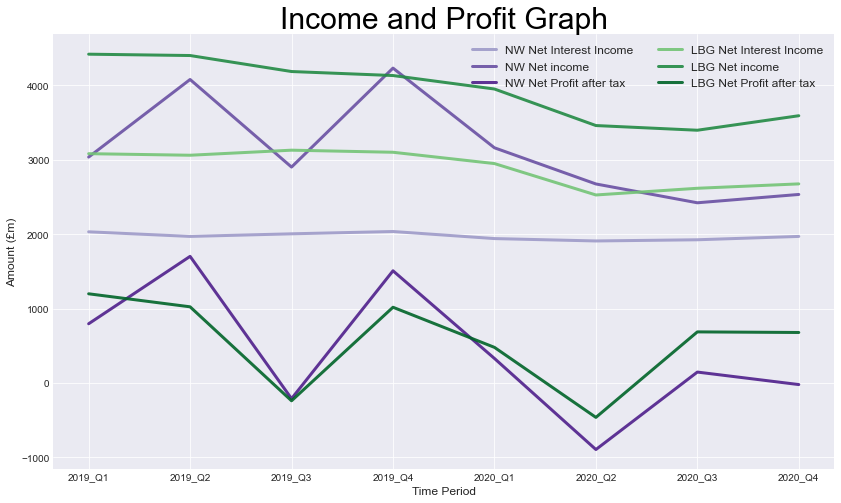

In [51]:
income_table.rename(columns = quarter_remap, inplace = True)
income_table = income_table.drop(index = ['NW Profit before tax','LBG Profit before tax'], columns = ['2019_Full year','2020_Full year'])

# Change size of plot
plt.figure(figsize=(14,8))

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')

cmap_g = cm.get_cmap('Greens')
cmap_p = cm.get_cmap('Purples')
palette = [cmap_p(0.5),cmap_p(0.75),cmap_p(0.9),cmap_g(0.5),cmap_g(0.75),cmap_g(0.9)]

 
# Plot multiple lines
for num in range(0,6):
    plt.plot(income_table.columns, income_table.iloc[num,:], marker='', color=palette[num], linewidth=3, alpha=0.9,
            label = income_table.index[num])

# Add legend
plt.legend(loc=1, ncol=2, fontsize = 12)
 
# Add titles
plt.title('Income and Profit Graph', loc='center', fontsize=30, fontweight=0, color='black')
plt.xlabel('Time Period',fontsize = 12)
plt.ylabel('Amount (£m)',fontsize = 12)

# Show the graph
plt.show()

The first visual is a graph showing 3 important metrics relating to income and profitability:
- Interest income - Interest income is the most important income source for banks, so a view of this indicates how stable the companys main income is.
- Net income - The view of net income shows how stable overall income is, which can be contrasted to interest income.
- Profit after Tax - As well as wanting a view of income, it's important to know if the company is actually making a profit in its operations over the year. 

I chose a line chart for these as the trends overtime are potentially more important than the figures themselves.
- We can see from the chart that Lloyds income is higher than NatWests overall. Lloyds interest income was more affected from NatWest during 2020, potentially indicating a bigger impact in loan repayments from customers due to COVID-19. 
- NatWest other income sources were substantially impacted during 2020, impacting overall income despite the stablility of interest income.
- Profit After Tax for both comanies trends similarly. We can see that NatWest was more profitable in 2019 and actually made a loss in 2020, compared with Lloyds that remained profitable in 2020 even though profit was down in the year.

In [52]:
nw_assets_equity = ['Loans to banks - amortised cost (1)','Loans to customers - amortised cost','Total assets','Total equity']
nw_df_assets = nw_df_2_1.loc[nw_assets_equity,['2019_31 December_£m','2020_30 June_£m','2020_31 December_£m']]
nw_df_assets.iloc[1,:] = nw_df_assets.iloc[0,:] + nw_df_assets.iloc[1,:]
nw_df_assets = nw_df_assets.iloc[1:,:]

index_remapping = {'Loans to customers - amortised cost':'Loans to Customers',
             'Total assets':'Total assets',
             'Total equity':'Total equity'}
columns_remapping = {'2019_31 December_£m':'NW 31 Dec 2019',
             '2020_30 June_£m':'NW 30 June 2020',
             '2020_31 December_£m':'NW 31 Dec 2020'}

nw_df_assets.rename(index = index_remapping, columns = columns_remapping, inplace = True)

In [53]:
lbg_assets_equity = ['Loans and advances to customers','Total assets','Total equity']
lbg_df_assets = lbg_df_2.loc[lbg_assets_equity,:]
lbg_df_assets = lbg_df_assets.iloc[1:,:]
lbg_df_assets = lbg_df_assets * 1000

index_remapping = {'Loans and advances to customers':'Loans to Customers',
             'Total assets':'Total assets',
             'Total equity':'Total equity'}
columns_remapping = {'31_Dec_2020_£bn':'LBG 31 Dec 2019',
             '30_June_2020_£bn':'LBG 30 June 2020',
             '31_Dec_2019_£bn':'LBG 31 Dec 2020'}

lbg_df_assets.rename(index = index_remapping, columns = columns_remapping, inplace = True)

In [54]:
asset_equity_table = nw_df_assets.merge(lbg_df_assets, how='left', on = lbg_df_assets.index)
asset_equity_table.set_index(asset_equity_table['key_0'], drop = True, inplace = True)
asset_equity_table = asset_equity_table.drop(columns=['key_0'])
asset_equity_table = asset_equity_table.astype(int)

row_1 = asset_equity_table.iloc[1,:] - asset_equity_table.iloc[0,:]
row_1.rename(index = 'Other Assets', inplace = True)
row_2 = asset_equity_table.iloc[0,:] - asset_equity_table.iloc[2,:]
row_2.rename(index = 'Loans to Customers_1', inplace = True)
asset_equity_table = asset_equity_table.append(row_1)
asset_equity_table = asset_equity_table.append(row_2)
asset_equity_table = asset_equity_table.reindex(['Total equity','Loans to Customers_1','Other Assets','Loans to Customers','Total assets'])
asset_equity_table

,NW 31 Dec 2019,NW 30 June 2020,NW 31 Dec 2020,LBG 31 Dec 2019,LBG 30 June 2020,LBG 31 Dec 2020
key_0,,,,,,
Total equity,43556,43061,43824,49400,48900,47800
Loans to Customers_1,290945,317291,323675,390800,391500,392600
Other Assets,388538,446535,431992,431100,432600,393500
Loans to Customers,334501,360352,367499,440200,440400,440400
Total assets,723039,806887,799491,871300,873000,833900


In [55]:
## Visual 2

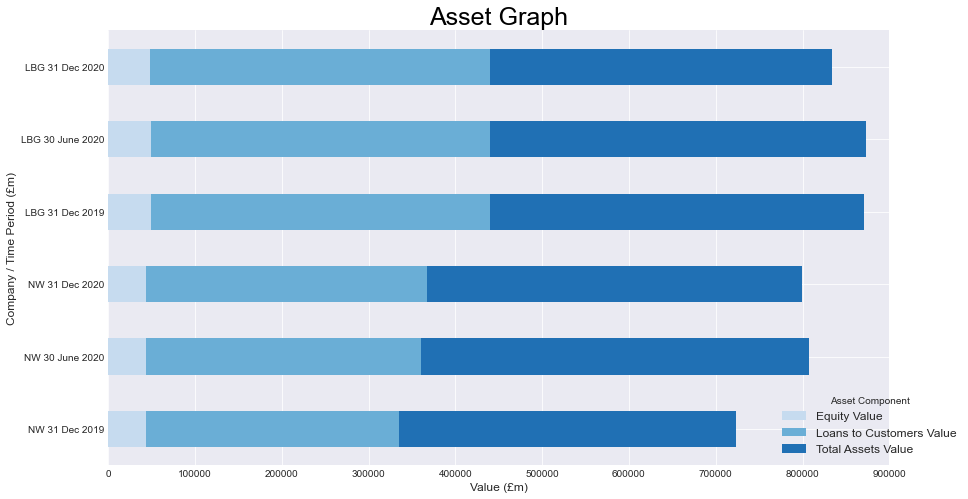

In [56]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')

# Plot data
asset_equity_table.iloc[:3,:].T.plot(kind='barh', stacked=True,
          colormap=ListedColormap(sns.color_palette("Blues", 3)), figsize = (14,8))

# Add legend
plt.legend(loc=4, ncol=1, title = 'Asset Component', fontsize = 12, bbox_to_anchor=(1.1, 0),
           labels = ['Equity Value','Loans to Customers Value', 'Total Assets Value'])
 
# Add titles
plt.title('Asset Graph', loc='center', fontsize=25, fontweight=0, color='black')
plt.xlabel('Value (£m)',fontsize = 12)
plt.ylabel('Company / Time Period (£m)',fontsize = 12)
plt.xlim(0,900000)

# Show the graph
plt.show()

My second visual is a bar chart, showing information about the company's assets.

- Total equity shows the difference between total assets and total liabilities By providing a view of equity, it indicates whether the company has more assets than liabilities.
- Loans to customers are normally the largest assets for a highstreet bank can have, so it is important to have site of them to see if the bank is changing their strategy.
- Total assets indicate the full value of everything owned by the company. If this increases then it indicates that the company is expanding.

To make it easier to understand, I have produced a stacked bar chart showing the figures of the 3 metrics chosen. It provides a clear view of changes within the company's financials.

- We can see that equity value is stable over all the time periods for each company. That means that any increase/drop in asset value is mirrored by an equal drop/increase in liabilities.
- We can see that Lloyds total assets have increased substantially during H1 2020 which could indicate an acqusition funded by loans (given that there was an equal increase liabilities.
- NatWest has the opposite trend of asset value materially decreasing in H2 2020 indicating a possible sale of part of the business.

In [57]:
lbg_ratios = ['Cost:income ratio','Earnings per share ','Risk-weighted assets','Loan to deposit ratio']
lbg_dates = ['2019_Full year','2020_Full year']
lbg_df_ratios = lbg_df_1_2.loc[lbg_ratios,lbg_dates]

In [58]:
nw_ratios_1 = ['Cost:income ratio (1)','Earnings/(loss) per ordinary share - basic']
nw_ratios_2 = ['Risk-weighted assets (RWAs) (£bn) ','Loan:deposit ratio']
nw_dates_1 = ['2019_Full year_£m','2020_Full year_£m']
nw_dates_2 = ['2019_31 December','2020_31 December']
nw_df_1_2_temp = nw_df_1_2.rename(columns={'2019_Full year_£m':'2019_31 December','2020_Full year_£m':'2020_31 December'})
nw_df_ratios = pd.concat([nw_df_1_2_temp.loc[nw_ratios_1,nw_dates_2],nw_df_2_2.loc[nw_ratios_2,nw_dates_2]])

In [59]:
remap_naming = {'Cost:income ratio':'Cost to Income Ratio (%)',
               'Cost:income ratio (1)':'Cost to Income Ratio (%)',
               'Earnings per share':'Earnings per share (p)',
               'Earnings/(loss) per ordinary share - basic':'Earnings per share (p)',
               'Risk-weighted assets':'Risk-weighted assets (RWAs) (£bn)',
               'Loan to deposit ratio':'Loan to Deposit Ratio (%)',
               'Loan:deposit ratio':'Loan to Deposit Ratio (%)'}
remap_dates = {'2019_Full year':'At 31 December 2019',
               '2019_31 December':'At 31 December 2019',
               '2020_Full year':'At 31 December 2020',
               '2020_31 December':'At 31 December 2020'}
lbg_df_ratios.rename(index = remap_naming, columns = remap_dates, inplace=True)
nw_df_ratios.rename(index = remap_naming, columns = remap_dates, inplace=True)

In [60]:
nw_df_ratios = pd.concat([nw_df_ratios], axis=1, keys=['NatWest'])
lbg_df_ratios = pd.concat([lbg_df_ratios], axis=1, keys=['LBG'])
df_ratios = nw_df_ratios.merge(lbg_df_ratios, how = 'left', on=nw_df_ratios.index)

## Visual 3

In [61]:
df_ratios.iloc[0,1:] = df_ratios.iloc[0,1:].apply(lambda x: round(float(x)*100,1))
df_ratios.iloc[2,1:] = df_ratios.iloc[2,1:].apply(lambda x: round(x,0))
df_ratios.iloc[3,1:] = df_ratios.iloc[3,1:].apply(lambda x: round(float(x)*100,1))
df_ratios.rename(columns = {'key_0': 'Metric'}, inplace = True)
df_ratios

Metric             NatWest                      \
                                      At 31 December 2019 At 31 December 2020   
0            Cost to Income Ratio (%)                65.1                72.9   
1              Earnings per share (p)                  26                -6.2   
2  Risk-weighted assets (RWAs) (£bn)                179.0               170.0   
3           Loan to Deposit Ratio (%)                88.5                83.5   

                  LBG                      
  At 31 December 2019 At 31 December 2020  
0                48.5                55.3  
1                 3.5                 1.2  
2               203.0               203.0  
3               107.0                98.0

My final visualisation is a simple table of some financial metrics. It shows the end of year figures for 2019 & 2020 for each company. An end user could use these to compare performance in 2019 to 2020 for each company at a glance, noting that comparisons of the companies figures directly may not be as insightful.

- Cost to Income indicates profitability of a company, with lower values indicating high profitability as the company is spending a smaller percentage of its income on operations. 
- Earnings per share also indicates profitability, but is not comparable between companies as there are different values of outstanding shares. It does provide a view of how performance has differed year on year however.
- RWAs indicate the amount of capital that must be held by the bank. An increase or decrease in RWAs could indicate a change in company strategy (risking or desrisking the portfolio).
- Loans to Deposit indicates the liquidity of banks, with higher values potentially meaning the firm may struggle with unforeseen expenses and lower values possible indicating unutilised value. An ideal range of loan to deposit ratio is c.80-90%.